# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import root_mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Data preprocessing

## Importing and stuff

In [ ]:
clients_promo_october = pd.read_csv(r'data\clients_promo_october.csv')
mobile_events = pd.read_csv(r'data\mobile_events.csv')
orders = pd.read_csv(r'data\orders.csv')
submit = pd.read_csv(r'data\submit.csv')
test_df = pd.read_csv(r'data\test.csv')
train_target = pd.read_csv(r'data\train_target.csv')

In [15]:
clients_promo_october.head()

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount
0,000D3A20F23EA95811E7B7104AC23CD3,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,25
1,000D3A20F23EA95811E7B7D79FAABAA1,5,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,300
2,000D3A20F23EA95811E7B8BD71C73877,7,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,200
3,000D3A20F23EA95811E7B99F3ED09FC8,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,30
4,000D3A20F23EA95811E7BD373E79565E,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,20


In [16]:
mobile_events.head()

,ClientUUId,VisitToken,EventName,Platform,Timestamp
0,000D3A22FA54A81611EB315CF5443815,976627AD-76DC-41D9-981E-F2A6CA14B3A9,screen_menu,ios,2023-10-29T16:14:21.343Z
1,2A4A64AF719E994511EE3F2D8B31E188,5b22e610-c71e-4b6a-a842-71e8575ece87,screen_menu,android,2023-10-29T11:04:36.4840000Z
2,000D3AAC977BBB2F11ECDD081F5481AE,BDCEB72F-2B6A-4565-801A-6CB729279C6F,open_app,ios,2023-10-29T11:14:34.723Z
3,000D3A21DA51A81411EAE468856F96F1,A66E2DA6-4E2E-4C37-9FBF-627732623212,add_to_cart,ios,2023-10-29T14:03:08.363Z
4,000D3A23B0DC80D811E67F4D0A9CA345,1BE8139F-A3D3-439F-A51B-5CBD4D3FFF1B,screen_menu,ios,2023-10-29T08:35:40.127Z


In [17]:
mobile_events['EventName'].unique(), mobile_events.shape, mobile_events['EventName'].value_counts()['apply_personal_offer']

(array(['screen_menu', 'open_app', 'add_to_cart', 'close_app',
        'create_order', 'screen_profile', 'screen_cart',
        'open_product_card', 'apply_personal_offer', 'remove_from_cart',
        'open_bonusaction'], dtype=object),
 (3916654, 5),
 26864)

In [18]:
orders.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo
0,020DD76CCD949AE011EDE031ED5D76FD,NaN,NaN,000D3AAC9DCABB2E11EBE0614C89D044,2023-04-21,2023-04-21T20:51:26.000Z,000D3A2480C380DA11E692CFB9F92484,0,18,000D3A240C71BE9A11E719BE2AB264A6,4,1.0,45.0,4,2,1.0,3,0
1,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EC9AABAD354BE051CCF1EE1F83A8D0,1,485.0,485.0,4,2,1164.0,1,0
2,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EB846583CB3BDEA80D1A7F2E184D40,1,589.0,589.0,4,2,1164.0,1,0
3,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB267FD,4,45.0,45.0,4,2,1164.0,1,0
4,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB264A6,4,45.0,45.0,4,2,1164.0,1,0


In [19]:
submit.head()

,apply_promo
0,0.307216
1,0.917305
2,0.386569
3,0.542179
4,0.536205


In [20]:
submit.shape, test_df.shape, train_target.shape

((6806, 1), (6806, 7), (27741, 8))

In [21]:
test_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount
0,000D3A20F23EA95811E7C0A95563344E,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
1,000D3A20F23EA95811E7C7892A0CE261,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,699,200
2,000D3A20F23EA95811E7CD686C396528,6,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,20
3,000D3A20F23EA95911E7CEA8C574EDAE,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
4,000D3A20F23EA95911E7D4F05C59C978,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200


In [22]:
train_target.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo
0,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0
1,000D3A20F23EA95811E7B99F3ED09FC8,6,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,25,0
2,000D3A20F23EA95811E7BD373E79565E,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0
3,000D3A20F23EA95811E7BD373E79565E,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0
4,000D3A20F23EA95811E7BDAE71CD3F33,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,30,0


In [23]:
train_target['apply_promo'].value_counts()

apply_promo
0    26914
1      827
Name: count, dtype: int64

In [24]:
train_target.head(2)

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo
0,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0
1,000D3A20F23EA95811E7B99F3ED09FC8,6,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,25,0


## orders_df preprocessing

In [ ]:
orders.head(3)

In [ ]:
orders.shape

In [25]:
orders['ClientUUId'].unique().shape, orders['OrderUUId'].unique().shape

((16337,), (157621,))

In [26]:
orders_df = orders.copy()

In [27]:
orders_df.columns

Index(['OrderUUId', 'addressId', 'deliverySectorId', 'ClientUUId', 'Date',
       'SaleDate', 'UnitUUId', 'NewClient', 'ClientOrderNumber', 'ProductUUId',
       'CategoryId', 'ProductTotalPrice', 'MenuPrice', 'OrderState',
       'OrderPaymentType', 'OrderTotalPrice', 'OrderType', 'apply_promo'],
      dtype='object')

In [28]:
orders_df = orders_df.drop(columns=['addressId', 'deliverySectorId', 'UnitUUId', 'ProductUUId', 
                                    'CategoryId', 'ProductTotalPrice', 'MenuPrice', 'OrderPaymentType'])


In [29]:
orders_df = orders_df.groupby('OrderUUId').first()

In [ ]:
orders_df.head(3)

4 - Done; 11 - Not done

In [30]:
orders_df['OrderState'].value_counts()

OrderState
4     155808
11      1813
Name: count, dtype: int64

In [31]:
orders_df['NewClient'].value_counts()

NewClient
0    157511
1       110
Name: count, dtype: int64

In [32]:
orders_df['apply_promo'].value_counts()

apply_promo
0    132899
1     24722
Name: count, dtype: int64

In [33]:
client_promos = orders_df[['ClientUUId', 'apply_promo']].groupby('ClientUUId', as_index=False).sum()

In [ ]:
client_promos.sample(3)

In [34]:
client_orders = orders_df[['ClientUUId', 'ClientOrderNumber']].groupby('ClientUUId', as_index=False).last()

In [ ]:
client_orders.sample(3)

In [35]:
client_orders_promos = client_orders.merge(right=client_promos, on='ClientUUId')

In [ ]:
client_orders_promos.head(3)

In [37]:
client_orders_promos.shape

(16337, 3)

## Looking at all the promos

In [36]:
clients_promo_october.head(3)

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount
0,000D3A20F23EA95811E7B7104AC23CD3,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,25
1,000D3A20F23EA95811E7B7D79FAABAA1,5,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,300
2,000D3A20F23EA95811E7B8BD71C73877,7,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,200


In [38]:
promos_df = clients_promo_october.copy()

In [39]:
promos_df = promos_df[['ClientUUId', 'Id']].groupby('ClientUUId', as_index=False).count()
promos_df = pd.DataFrame(promos_df).rename(columns={'Id': 'total_promos'})

In [ ]:
promos_df.sample(3)

In [40]:
promos_df.shape

(30000, 2)

## Combining total orders, total promos and applied promos together

In [41]:
client_orders_promos = client_orders_promos.merge(right=promos_df, on='ClientUUId', how='inner'
                                                  ).rename(columns={'ClientOrderNumber': 'total_orders',
                                                                    'apply_promo': 'total_applied'})

In [ ]:
client_orders_promos.sample(3)

In [42]:
client_orders_promos.shape

(16337, 4)

## Processing mobile_events

In [ ]:
mobile_events.head()

In [43]:
mobile_events['ClientUUId'].unique().shape, mobile_events['VisitToken'].unique().shape

((29838,), (223964,))

In [44]:
mobile_df = mobile_events.copy()

In [45]:
mobile_df = mobile_df.groupby(['ClientUUId', 'EventName'], as_index=False).count()[['ClientUUId', 'EventName', 'Timestamp']
                                                                                   ].rename(columns={'Timestamp': 'count_event'})

In [ ]:
mobile_df.head(15)

In [46]:
applied = mobile_df.loc[mobile_df['EventName'] == 'apply_personal_offer'].drop(columns=['EventName']
                                                                               ).rename(columns={'count_event': 'total_applied'})
ordered = mobile_df.loc[mobile_df['EventName'] == 'create_order'].drop(columns=['EventName']
                                                                       ).rename(columns={'count_event': 'total_orders'})

In [ ]:
applied.sample()

In [ ]:
ordered.sample()

In [47]:
orders_promos = ordered.merge(applied, on='ClientUUId', how='inner')

In [ ]:
orders_promos.sample(10)

In [48]:
orders_promos = orders_promos.query('total_orders >= total_applied')

In [ ]:
orders_promos.sample(10)

In [49]:
orders_promos.shape

(10912, 3)

## Joining orders_promos to client base

In [50]:
orders_promos = orders_promos.merge(right=promos_df, on='ClientUUId', how='inner'
                                                  ).rename(columns={'ClientOrderNumber': 'total_orders',
                                                                    'apply_promo': 'total_applied'})

In [ ]:
orders_promos.sample(3)

In [ ]:
orders_promos.shape

## Joining total clients base

In [ ]:
client_orders_promos.sample(2)

In [ ]:
orders_promos.sample(2)

In [51]:
client_base = pd.concat(objs=[client_orders_promos, orders_promos])

In [52]:
client_base = client_base.groupby('ClientUUId').sum()

In [53]:
client_base['promo_usage'] = client_base['total_applied'] / client_base['total_promos']

In [54]:
client_base = client_base.query('total_orders >= total_applied')

In [55]:
client_base.sample(10)

,total_orders,total_applied,total_promos,promo_usage
ClientUUId,,,,
000D3A21DA51A81411EB062B8E92DAA5,125,0,18,0.000000
66C5387CE155967111ED72F2331F59A6,15,2,18,0.111111
000D3A24D2B7A94311E8BE5E3D13FD3B,49,0,18,0.000000
000D3A240C71B1B411E653BD0640043E,3,2,18,0.111111
000D3AAC9DCABB2C11EBBEF269A3195C,24,0,14,0.000000
000D3A22FA54A81411E956EA0451310F,73,0,18,0.000000
92F5C8E4E292A67411ECF0738D859925,2,1,18,0.055556
000D3A23B0DC80DE11E7AC5B638DF34B,56,4,14,0.285714
000D3AAC9DCABB2B11EBAC330EF32067,129,0,14,0.000000


In [56]:
client_base.shape

(20796, 4)

# Working on train dataset

In [ ]:
train_target.head()

In [ ]:
train_target.shape

In [57]:
train_df = train_target.copy()

In [58]:
train_df = train_df.merge(right=client_base, on='ClientUUId', how='inner')

In [59]:
train_df.sample(10)

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,total_orders,total_applied,total_promos,promo_usage
6839,000D3A39D824A82E11EAAFFC8BB3DC35,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,200,0,61,1,16,0.062500
3638,000D3A22FA54A81411E941A8430C9FF8,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,18,3,32,0.093750
1744,000D3AAC9DCABB2E11EC63D77BCB27DA,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,20,0,67,7,28,0.250000
1452,000D3A39D824A82F11EB314F23B498AC,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,20,0,31,2,36,0.055556
1380,000D3A39D824A82E11EA571C4E778197,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1199,250,0,9,2,36,0.055556
5508,000D3A284715A95811E848AE54DC9328,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,42,1,32,0.031250
2563,000D3A2155A180E811E7A99D6D65D4DD,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,200,0,25,1,36,0.027778
7469,000D3AAC977BBB2F11EC9D3DBDEF3BC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,26,5,36,0.138889
11858,000D3A22FA54A81711EB3B883F7D8748,7,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,96,7,36,0.194444
17889,000D3A25D54580E211E7204218E8EEFE,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,30,0,22,5,36,0.138889


In [60]:
train_df.shape

(19267, 12)

In [61]:
train_df['ClientUUId'].unique().shape

(12858,)

In [62]:
train_df['Discount'] = np.where(train_df['Id'] == 6,
                                 round(train_df['OrderPrice'] * train_df['Discount'] / 100, 0),
                                 train_df['Discount'])

In [63]:
train_df['total_promos'].isna().value_counts()

total_promos
False    19267
Name: count, dtype: int64

In [64]:
train_df.sample(10)

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,total_orders,total_applied,total_promos,promo_usage
7460,000D3AAC977BBB2E11EC949C3FB6FF87,7,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,200.0,0,15,0,18,0.000000
8289,000D3ABF84C3BB2E11EC002F09452B08,7,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250.0,0,2,1,18,0.055556
3424,000D3A2231E0A95111E80D6472C671FC,7,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250.0,0,54,2,14,0.142857
16536,3E9C0E94CE8C96CE11ED927A7EC61B76,7,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250.0,0,12,0,12,0.000000
2658,000D3A21DA51A81211E9374AEFDD1168,6,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,187.0,0,16,3,28,0.107143
18596,000D3AAC977BBB2D11EC672C86534065,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200.0,0,2,1,14,0.071429
10815,000D3A21DA51A81411EAC5B481AD0F29,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,150.0,0,26,0,18,0.000000
1342,000D3A39D824A82E11EA0EA6E14FC59A,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,187.0,0,2,2,18,0.111111
4350,000D3A23B0DC80DB11E6F9AAD9C73F53,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200.0,1,3,3,18,0.166667
2025,0291B3EA628D98B911ED2851CC6E7F73,7,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,899,150.0,0,29,4,36,0.111111


In [65]:
train_df.shape

(19267, 12)

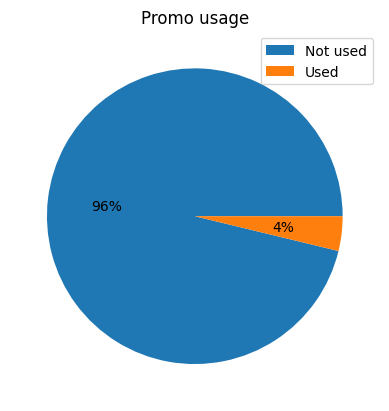

In [66]:
plt.pie(train_df['apply_promo'].value_counts(), autopct='%1.0f%%')
plt.title('Promo usage')
plt.legend(['Not used', 'Used'])
plt.show()

## Working on actual test DF

In [ ]:
test_df.sample(3)

In [67]:
test_df.shape

(6806, 7)

In [68]:
test_val = test_df.merge(right=client_base, on='ClientUUId', how='left')

In [69]:
test_val['Discount'] = np.where(test_val['Id'] == 6,
                                 round(test_val['OrderPrice'] * test_val['Discount'] / 100, 0),
                                 test_val['Discount'])

In [70]:
test_val.sample(3)

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,total_orders,total_applied,total_promos,promo_usage
2396,000D3A22FA54A81311E931BC480603C0,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,599,150.0,25.0,2.0,18.0,0.111111
4163,000D3ABF84C3BB2811EB688CF3074370,7,"1,2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,1249,200.0,2.0,2.0,16.0,0.125000
6683,1E398BFC8319B23811EE2958217CCBDB,7,"1,2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,1249,250.0,9.0,5.0,36.0,0.138889


In [71]:
test_val.shape

(6806, 11)

In [72]:
test_val['total_orders'].isna().value_counts()

total_orders
False    4737
True     2069
Name: count, dtype: int64

managed to beat it by 1000

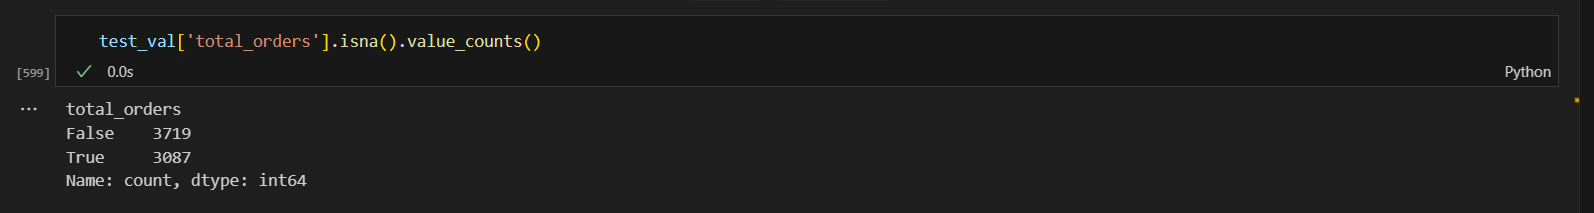

In [74]:
test_val.columns

Index(['ClientUUId', 'Id', 'OrderType', 'LocalBeginDate', 'LocalEndDate',
       'OrderPrice', 'Discount', 'total_orders', 'total_applied',
       'total_promos', 'promo_usage'],
      dtype='object')

In [73]:
FILLNA = ['total_orders', 'total_applied','total_promos', 'promo_usage']

In [75]:
test_val[FILLNA]= test_val[FILLNA].fillna(test_val[FILLNA].interpolate())

In [76]:
test_val[['total_orders', 'total_applied','total_promos']] = round(test_val[['total_orders', 'total_applied','total_promos']], 0)

In [77]:
test_val.sample(10)

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,total_orders,total_applied,total_promos,promo_usage
865,000D3A2C5B29A94A11E8244D8EF9DD3D,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200.0,73.0,0.0,18.0,0.000000
1740,5679BCAB402582FE11EE49653ACD0660,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200.0,4.0,2.0,18.0,0.083333
3142,000D3A39D824A82E11E9BFF36C478A43,6,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,699,210.0,82.0,4.0,25.0,0.228175
5516,000D3A258645A95411E842E2E7237C6E,7,"1,2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,1249,200.0,53.0,4.0,28.0,0.142857
3583,000D3AAF2133A81111EA4D59793313BE,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200.0,24.0,3.0,28.0,0.107143
238,000D3A220EF680D511E6C2F1F4308DDA,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,699,200.0,268.0,1.0,26.0,0.027778
3981,72E7A16BDD00A2D111ED3C9B3AEA8C5D,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,749,200.0,39.0,0.0,16.0,0.000000
2208,000D3A21DA51A81211E9EB852B8EBC39,6,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,749,187.0,17.0,1.0,36.0,0.027778
1830,82BFAECB3DD390C111ED21EBC5D7C2B7,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,749,150.0,72.0,0.0,18.0,0.000000
2859,000D3A2715C5A94F11E7D08727E0ACDC,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200.0,76.0,1.0,16.0,0.062500


In [78]:
test_val.shape

(6806, 11)

## Setting data types

### Training dataset

In [79]:
train_df.dtypes

ClientUUId         object
Id                  int64
OrderType          object
LocalBeginDate     object
LocalEndDate       object
OrderPrice          int64
Discount          float64
apply_promo         int64
total_orders        int64
total_applied       int64
total_promos        int64
promo_usage       float64
dtype: object

In [80]:
train_df['OrderPrice'].unique()

array([ 699, 1249,  799,  999, 1199,  749,  899, 1049, 1149,  849,  599,
       1099,  949,  649], dtype=int64)

In [81]:
train_df['OrderType'] = [int(record) for record in train_df['OrderType'].str.split(",").str.join("")]

In [82]:
train_df['ClientUUId'] = train_df['ClientUUId'].astype('category')
train_df['Id'] = train_df['Id'].astype('category')
train_df['OrderType'] = train_df['OrderType'].astype('category')
train_df['LocalBeginDate'] = pd.to_numeric(pd.to_datetime(train_df['LocalBeginDate']))
train_df['LocalEndDate'] = pd.to_numeric(pd.to_datetime(train_df['LocalEndDate']))
train_df['OrderPrice'] = train_df['OrderPrice'].astype('int32')
train_df['Discount'] = train_df['Discount'].astype('int32')
train_df['total_orders'] = train_df['total_orders'].astype('int16')
train_df['total_applied'] = train_df['total_applied'].astype('int16')
train_df['total_promos'] = train_df['total_promos'].astype('int16')
train_df['promo_usage'] = train_df['promo_usage'].astype('float16')



In [83]:
train_df.dtypes

ClientUUId        category
Id                category
OrderType         category
LocalBeginDate       int64
LocalEndDate         int64
OrderPrice           int32
Discount             int32
apply_promo          int64
total_orders         int16
total_applied        int16
total_promos         int16
promo_usage        float16
dtype: object

### Testing + validation dataset

In [84]:
test_val.dtypes

ClientUUId         object
Id                  int64
OrderType          object
LocalBeginDate     object
LocalEndDate       object
OrderPrice          int64
Discount          float64
total_orders      float64
total_applied     float64
total_promos      float64
promo_usage       float64
dtype: object

In [85]:
test_val['OrderType'] = [int(record) for record in test_val['OrderType'].str.split(",").str.join("")]

In [86]:
test_val['ClientUUId'] = test_val['ClientUUId'].astype('category')
test_val['Id'] = test_val['Id'].astype('category')
test_val['OrderType'] = test_val['OrderType'].astype('category')
test_val['LocalBeginDate'] = pd.to_numeric(pd.to_datetime(test_val['LocalBeginDate']))
test_val['LocalEndDate'] = pd.to_numeric(pd.to_datetime(test_val['LocalEndDate']))
test_val['OrderPrice'] = test_val['OrderPrice'].astype('int32')
test_val['Discount'] = test_val['Discount'].astype('int32')
test_val['total_orders'] = test_val['total_orders'].astype('int16')
test_val['total_applied'] = test_val['total_applied'].astype('int16')
test_val['total_promos'] = test_val['total_promos'].astype('int16')
test_val['promo_usage'] = test_val['promo_usage'].astype('float16')



In [87]:
test_val.dtypes

ClientUUId        category
Id                category
OrderType         category
LocalBeginDate       int64
LocalEndDate         int64
OrderPrice           int32
Discount             int32
total_orders         int16
total_applied        int16
total_promos         int16
promo_usage        float16
dtype: object

## TRAIN-TEST Split

In [88]:
train_df.columns

Index(['ClientUUId', 'Id', 'OrderType', 'LocalBeginDate', 'LocalEndDate',
       'OrderPrice', 'Discount', 'apply_promo', 'total_orders',
       'total_applied', 'total_promos', 'promo_usage'],
      dtype='object')

In [89]:
FEATURES,\
      TARGET = ['ClientUUId', 'Id', 'OrderType', 'LocalBeginDate', 'LocalEndDate',
                    'OrderPrice', 'Discount', 'total_orders', 'total_applied', 'total_promos',
                      'promo_usage'],\
                          ['apply_promo']   

In [90]:
X, y = train_df[FEATURES], train_df[TARGET]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [ ]:
X_test.head(3)

## Pipeline

### Categorical features

In [92]:
CATEGORICAL =  X.select_dtypes(include=['category']).columns

In [93]:
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
)

### Numerical features

In [94]:
NUMERIC = X.select_dtypes(include=['int64', 'int32', 'int16', 'float16']).columns

In [95]:
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

### Preprocessor

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, CATEGORICAL),
        ('num', numeric_transformer, NUMERIC)
    ]
)

## Model selection

In [110]:
model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', RandomForestRegressor(criterion='poisson', random_state=42))
    ]
)

In [111]:
X_train.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,total_orders,total_applied,total_promos,promo_usage
16097,000D3ABF84C3BB3011ECD12E92EB5C9E,6,23,1698883200000000000,1699228740000000000,699,140,5,0,16,0.000000
4715,000D3A244991A94211E85539BEADB3FC,5,23,1698883200000000000,1699228740000000000,749,200,23,2,36,0.055542
2097,269E1CE26BB5903411EDB33B1CD7B091,5,123,1698883200000000000,1699228740000000000,1249,250,4,1,32,0.031250
6620,000D3A39D824A82E11E9EDCA7B61495D,7,23,1698883200000000000,1699228740000000000,799,200,56,7,16,0.437500
18717,000D3AAC9DCABB2E11EBFF426FEE7206,7,23,1698883200000000000,1699228740000000000,599,130,29,1,16,0.062500


In [100]:
model.fit(X=X_train, y=y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ClientUUId', 'Id', 'OrderType'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LocalBeginDate', 'LocalEndDate', 'OrderPrice', 'Discount',
       'total_orders', 'total_applied', 'total_promos', 'promo_usage'],
      dtype='object'))])),
                ('classifier',
                 RandomForestRegressor(criterion='poisson', random_state=0))])

In [101]:
y_test['prediction'] = model.predict(X=X_test)

In [102]:
y_test['prediction'].value_counts()

prediction
0.000210    852
0.000489     77
0.000238     72
0.000278     42
0.000353     39
           ... 
0.000897      1
0.001434      1
0.032828      1
0.000372      1
0.011125      1
Name: count, Length: 1899, dtype: int64

In [103]:
roc_auc = roc_auc_score(y_true=y_test['apply_promo'], y_score=y_test['prediction'])
roc_auc

0.9037984150559126

# Calculating

In [112]:
model.fit(X=X, y=y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ClientUUId', 'Id', 'OrderType'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LocalBeginDate', 'LocalEndDate', 'OrderPrice', 'Discount',
       'total_orders', 'total_applied', 'total_promos', 'promo_usage'],
      dtype='object'))])),
                ('classifier',
                 RandomForestRegressor(criterion='poisson', random_state=42))])

In [113]:
X_test_res = test_val[FEATURES]

In [114]:
result = pd.DataFrame(data=model.predict(X=X_test_res), columns=['apply_promo']).set_index('apply_promo')

In [115]:
result.head()

""
apply_promo
0.001203
0.006885
0.000527
0.000636
0.001407


In [116]:
result.index.max(), result.index.min()

(0.42882347462106357, 0.00016688688699062801)

In [117]:
result.to_csv(path_or_buf=r'data\result.csv', mode='w')